In [2]:
library("GNAR")
library("igraph")


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




In [5]:
int_to_mat <- function(i, size){
    # Convert i to binary
    binary <- as.integer(intToBits(i))
    length <- size*(size-1)/2
    binary <- binary[1:length]
    # Convert binary to a matrix
    matrix <- matrix(0,size,size)
    matrix[upper.tri(matrix)] <- binary
    return(matrix)
}

mat_to_int <- function(matrix){
    return(sum(matrix[upper.tri(matrix)]*2^(0:(length(matrix[upper.tri(matrix)])-1))))
}


In [ ]:
generateError <- function(size = 5, k = 1, seed = NA, order = 1){
    if (!is.na(seed)){
        set.seed(seed)
    }
    graph <- erdos.renyi.game(size, p=0.3, type = "gnp")
    # Generate list of length size with random values between -0.5 and 0.5
    alphaParams <- lapply(1:order, function(x) runif(size, min=-0.5, max=0.5))
    betaParams <- lapply(1:order, function(x) runif(1, min=-0.5, max=0.5))
    data <- GNARsim(n=200, net = igraphtoGNAR(graph), alphaParams = alphaParams, betaParams = betaParams)
    
    data.ts <- ts(data)
    errors <- c()
    numberofGraphs <- 2^(size*(size-1)/2)-1
    for (i in 1:numberofGraphs){
        # Convert i to binary
        if (i %% 100 == 0) {
            print(i)
        }
        matrix <- int_to_mat(i, size)
        err <- 0
        net <- matrixtoGNAR(matrix)
        for (j in 1:k){
            fit <- GNARfit(vts = data.ts[j:(199-k+j),], net = net, alphaOrder = 2, betaOrder = c(1,1))
            err <- err + sum((data[(200-k+j),] - predict(fit))^2)
        }
        errors <- c(errors, err/k)
    }
    return(errors)
}

getRandomSample <- function(size = 5, errors, sample = 100, erdos_prob=0.3){
    err <- c()
    for (i in 1:sample){
        graph <- erdos.renyi.game(size, p=erdos_prob, type = "gnp")
        matrix <- as_adjacency_matrix(graph, type = "upper")
        i <- mat_to_int(matrix)
        err <- c(err, errors[i])
    }
    return(err)
}


In [1]:
error <- read.table("./error_n=6_k=40_true=2_fit=2.txt", sep = "\t")
error <- as.matrix(error)

[[1]]
[1] -0.2076842  0.3372956 -0.2137767 -0.2331792 -0.3132772 -0.2677741

[[2]]
[1] -0.1833875 -0.1973066 -0.3409540 -0.4600041 -0.2812005  0.3105986

[[1]]
[1] 0.02569755

[[2]]
[1] 0.4146582



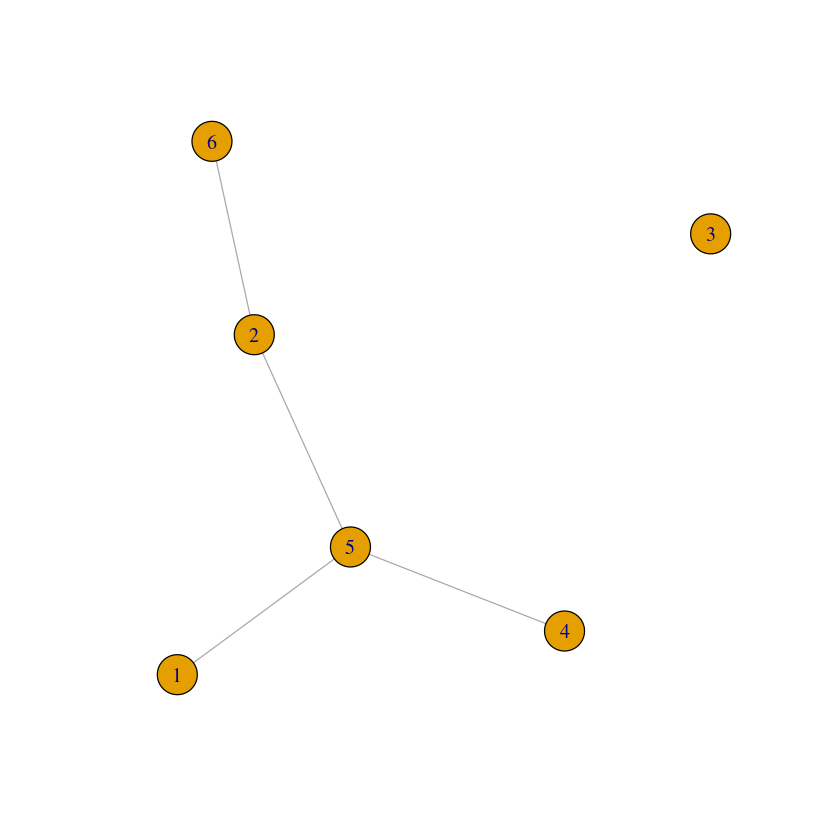

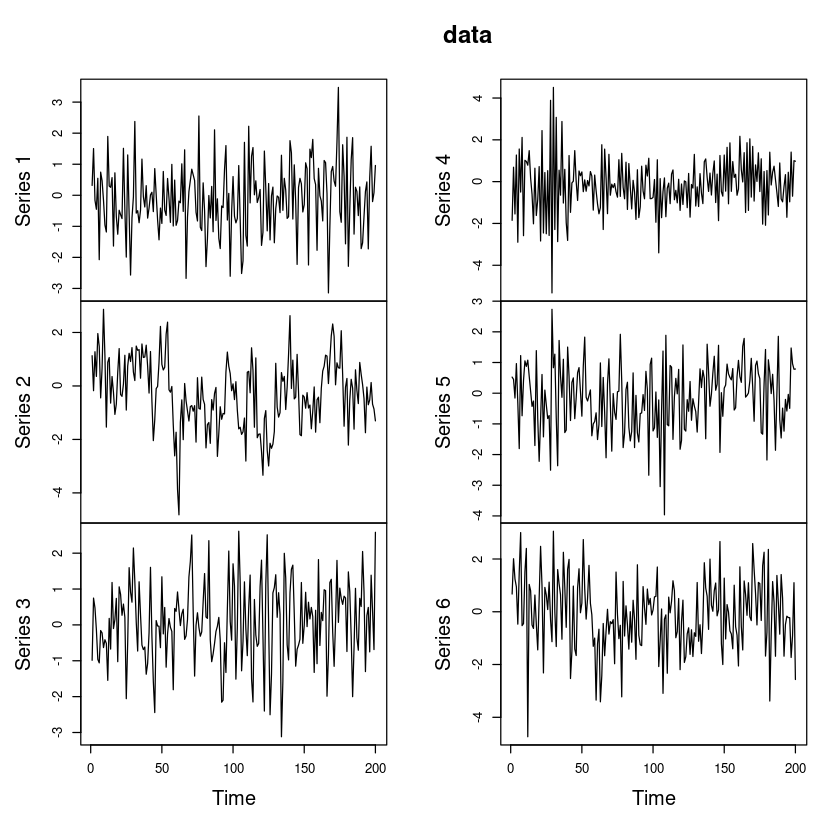

In [12]:
set.seed(1234)
graph <- erdos.renyi.game(6, p=0.3, type = "gnp")
# Generate list of length size with random values between -0.5 and 0.5
alphaParams <- lapply(1:2, function(x) runif(6, min=-0.5, max=0.5))
betaParams <- lapply(1:2, function(x) runif(1, min=-0.5, max=0.5))
# data <- GNARsim(n=200, net = igraphtoGNAR(graph), alphaParams = alphaParams, betaParams = betaParams)


plot(graph)
print(alphaParams)
print(betaParams)

#visualise the data
plot(data)

In [37]:
sum(error < 7.8)
sum(error < 7.6)

[1] 74

[1] 6

In [3]:
errors <- cbind(c(1:(2^15-1)), error)
errors <- errors[order(errors[,2]),]

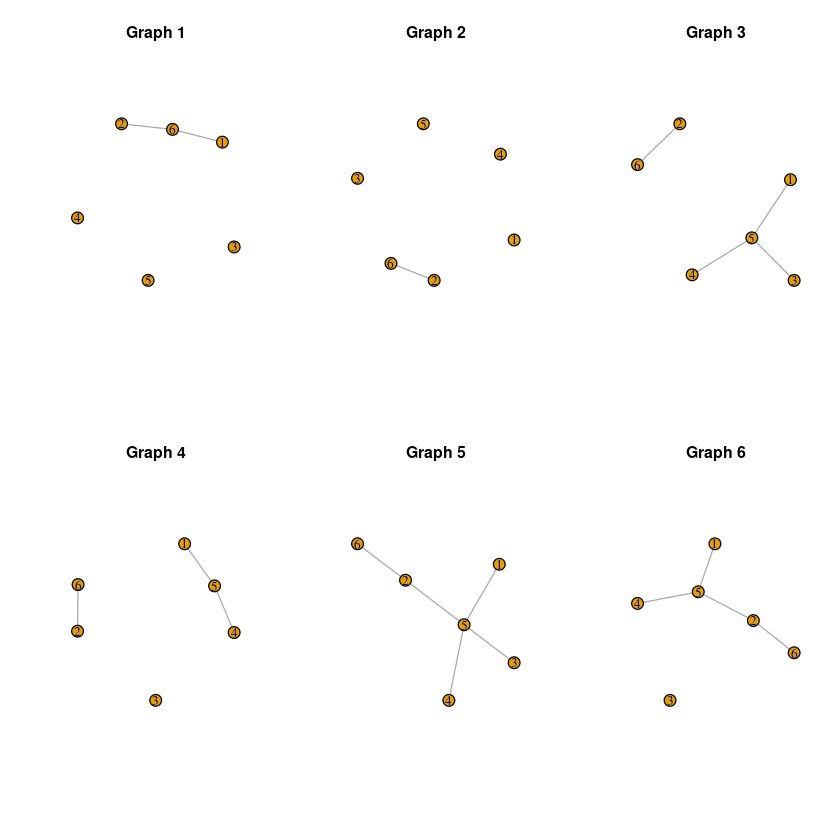

In [8]:
par(mfrow=c(2, 3))  # Set up a 2x3 plotting area

for (i in 1:6) {
    best_mat <- int_to_mat(errors[i, 1], 6)
    best_graph <- graph_from_adjacency_matrix(best_mat, mode = "upper")
    plot(best_graph, main=paste("Graph", i))
}

In [29]:
best_integer <- mat_to_int(as_adjacency_matrix(graph, type = "upper"))
print(best_integer)
print(error[best_integer])

[1] 2752
[1] 7.573289
